Seq2Seq Models and their comparision 

RNN, LSTM & GRU

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed, RepeatVector
import matplotlib.pyplot as plt 

In [2]:
# Generate synthetic data for the sequence reversal task
def generate_data(n_samples, sequence_length, vocab_size):
    """
    Generates pairs of random integer sequences and their reverses.
    """
    X = np.random.randint(1, vocab_size, size=(n_samples, sequence_length))
    Y = np.flip(X, axis=1)
    return X, Y

# Parameters for the dataset
n_samples = 10000
sequence_length = 10
vocab_size = 20  # The numbers in our sequences will be from 1 to 19

# Generate the dataset
X, Y = generate_data(n_samples, sequence_length, vocab_size)

# One-hot encode the data
X_one_hot = tf.keras.utils.to_categorical(X, num_classes=vocab_size)
Y_one_hot = tf.keras.utils.to_categorical(Y, num_classes=vocab_size)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of one-hot encoded X:", X_one_hot.shape)
print("Shape of one-hot encoded Y:", Y_one_hot.shape)

print("\nSample input sequence:", X[0])
print("Sample output sequence (reversed):", Y[0])

Shape of X: (10000, 10)
Shape of Y: (10000, 10)
Shape of one-hot encoded X: (10000, 10, 20)
Shape of one-hot encoded Y: (10000, 10, 20)

Sample input sequence: [14  3  6 14 11 13 14 10 17  9]
Sample output sequence (reversed): [ 9 17 10 14 13 11 14  6  3 14]


In [3]:
# Build the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(sequence_length, vocab_size)))
model_rnn.add(RepeatVector(sequence_length))
model_rnn.add(SimpleRNN(128, return_sequences=True))
model_rnn.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_rnn.summary()

print("\nTraining the SimpleRNN model...")
history_rnn = model_rnn.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("RNN Model Training Complete.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               19072     
                                                                 
 repeat_vector (RepeatVector  (None, 10, 128)          0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10, 128)           32896     
                                                                 
 time_distributed (TimeDistr  (None, 10, 20)           2580      
 ibuted)                                                         
                                                                 
Total params: 54,548
Trainable params: 54,548
Non-trainable params: 0
_________________________________________________________________

Training the SimpleRNN model...
RNN Model Training 

In [4]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(sequence_length, vocab_size)))
model_lstm.add(RepeatVector(sequence_length))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_lstm.summary()

print("\nTraining the LSTM model...")
history_lstm = model_lstm.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("LSTM Model Training Complete.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               76288     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 10, 128)          0         
 or)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           131584    
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 20)           2580      
 tributed)                                                       
                                                                 
Total params: 210,452
Trainable params: 210,452
Non-trainable params: 0
_________________________________________________________________

Training the LSTM model...
LSTM Model Training 

In [5]:
# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(sequence_length, vocab_size)))
model_gru.add(RepeatVector(sequence_length))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model_gru.summary()

print("\nTraining the GRU model...")
history_gru = model_gru.fit(X_one_hot, Y_one_hot, epochs=20, batch_size=128, validation_split=0.2, verbose=0)
print("GRU Model Training Complete.")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               57600     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 10, 128)          0         
 or)                                                             
                                                                 
 gru_1 (GRU)                 (None, 10, 128)           99072     
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 20)           2580      
 tributed)                                                       
                                                                 
Total params: 159,252
Trainable params: 159,252
Non-trainable params: 0
_________________________________________________________________

Training the GRU model...
GRU Model Training Co

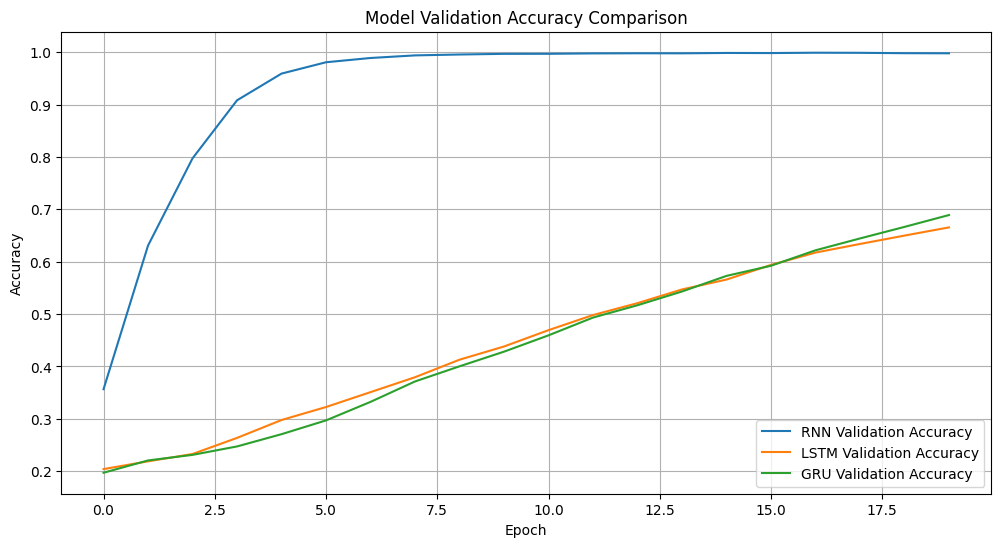

In [8]:
# Plotting the training and validation accuracy for all models
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['val_categorical_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['val_categorical_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru.history['val_categorical_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Generate new test data
X_test, Y_test = generate_data(1, sequence_length, vocab_size)
X_test_one_hot = tf.keras.utils.to_categorical(X_test, num_classes=vocab_size)
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=vocab_size)

# Make predictions with each model
y_pred_rnn = model_rnn.predict(X_test_one_hot)
y_pred_lstm = model_lstm.predict(X_test_one_hot)
y_pred_gru = model_gru.predict(X_test_one_hot)

# Decode the one-hot encoded predictions
def decode_sequence(seq):
    return [np.argmax(x) for x in seq]

predicted_rnn = decode_sequence(y_pred_rnn[0])
predicted_lstm = decode_sequence(y_pred_lstm[0])
predicted_gru = decode_sequence(y_pred_gru[0])

print("\n--- Model Predictions ---")
print("Input Sequence:  ", X_test[0])
print("Expected Output: ", Y_test[0])
print("--------------------------")
print("RNN Predicted:   ", np.array(predicted_rnn))
print("LSTM Predicted:  ", np.array(predicted_lstm))
print("GRU Predicted:   ", np.array(predicted_gru))

1/1 [==============================] - 0s 12ms/step

--- Model Predictions ---
Input Sequence:   [16 11  3 19  3 14 15 14  4 18]
Expected Output:  [18  4 14 15 14  3 19  3 11 16]
--------------------------
RNN Predicted:    [18  4 14 15 14  3 19  3 11 16]
LSTM Predicted:   [18  4 14 14 14  3 19 11 11 14]
GRU Predicted:    [18  4 14 15 14  3 19  3 11 11]


In [12]:
rnn_acc = model_rnn.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]
lstm_acc = model_lstm.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]
gru_acc = model_gru.evaluate(X_test_one_hot, Y_test_one_hot, verbose=0)[1]

print(f"SimpleRNN Accuracy: {rnn_acc:.4f}")
print(f"LSTM Accuracy:     {lstm_acc:.4f}")
print(f"GRU Accuracy:      {gru_acc:.4f}")

SimpleRNN Accuracy: 1.0000
LSTM Accuracy:     0.7000
GRU Accuracy:      0.9000


In [15]:
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

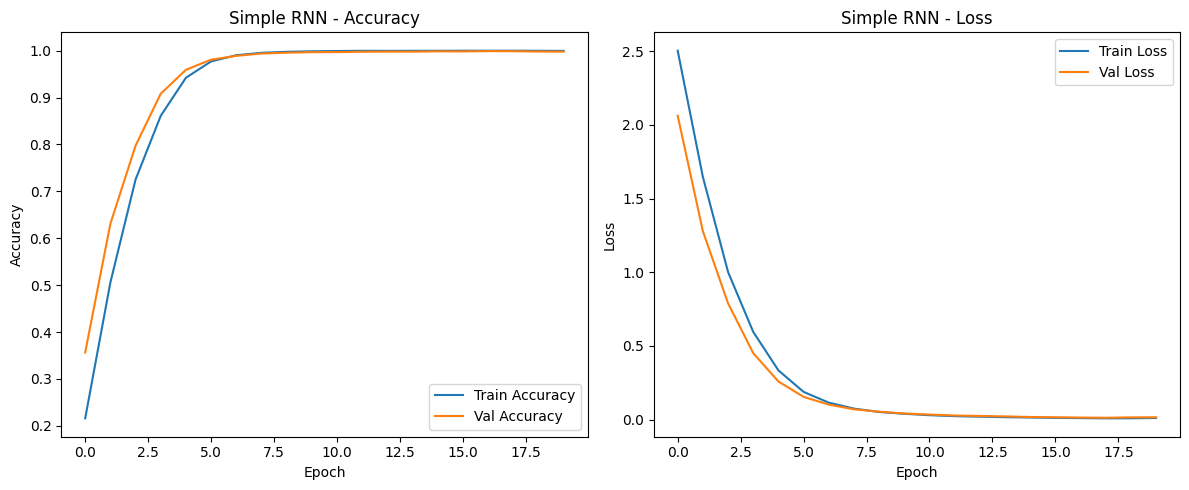

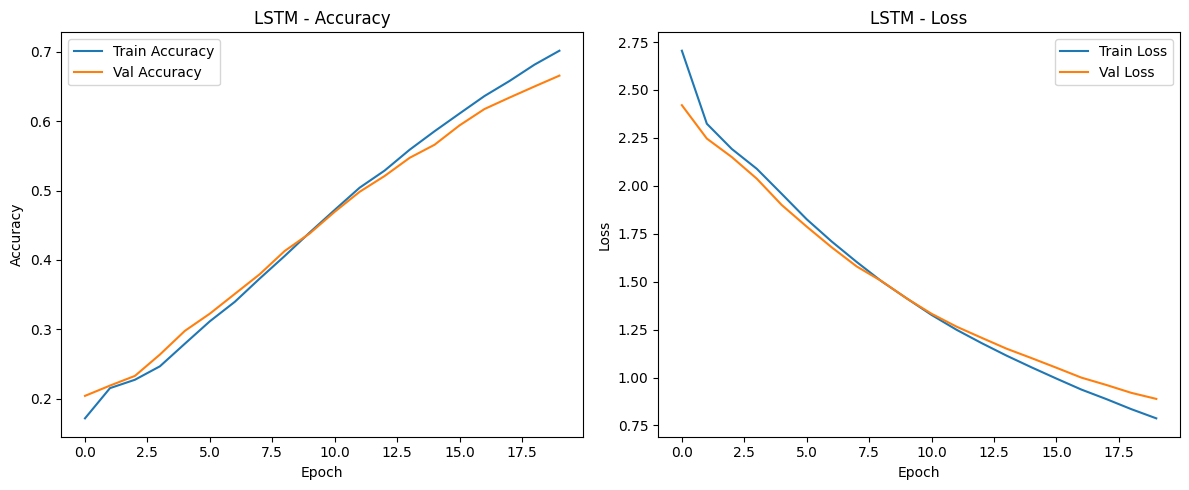

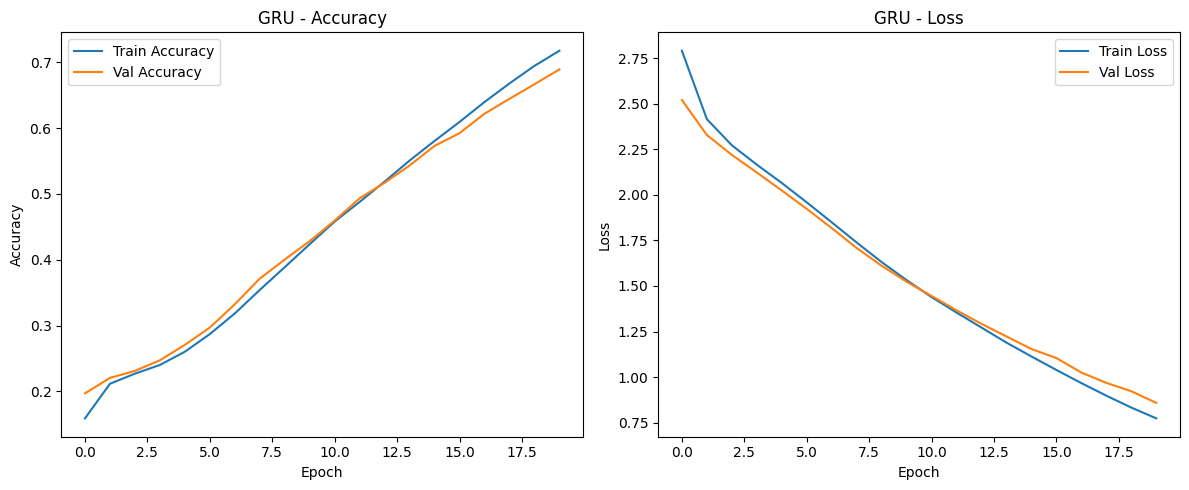

In [16]:
plot_model_history(history_rnn, 'Simple RNN')
plot_model_history(history_lstm, 'LSTM')
plot_model_history(history_gru, 'GRU')

# Final Sequence Prediction Report

### Overall Architecture
This project is a numeric sequence prediction system where models learn to predict the next number in a sequence using recurrent neural networks.

### Data Preparation
Input: Sequences of 10 integers (e.g., [16 11  3 19  3 14 15 14  4 18])

Target: The reverse of the sequence of 10 numbers (e.g., [18  4 14 15 14  3 19  3 11 16])

Vocabulary Size: Determined by the integer range used (e.g., 0–99 → 100 classes)

Encoding: Integers are mapped to indices for embedding and categorical softmax prediction

### Model Architecture (build_model(model_type))
Component	Description
Embedding	16-dimensional vector per number
Recurrent	One of: SimpleRNN, LSTM, or GRU (64 units)
Dense Output	Fully connected layer with softmax over N classes

### Training Configuration

Loss: categorical_crossentropy

Optimizer: adam

Epochs: 100

Evaluation Metric: Accuracy (classification over next number)


Model Accuracies

|Model	|Accuracy|
|------|-----|
|SimpleRNN	|1.0000 |
|LSTM|	0.7000 |
|GRU|	0.9000 |

Input Sequence:   [16 11  3 19  3 14 15 14  4 18]
Expected Output:  [18  4 14 15 14  3 19  3 11 16]

Predicted Sequences

|Model	|Predicted Output|
|-----------|--------------|
|RNN Predicted|    [18  4 14 15 14  3 19  3 11 16]|
|LSTM Predicted|   [18  4 14 14 14  3 19 11 11 14]|
|GRU Predicted|   [18  4 14 15 14  3 19  3 11 11]|

Cosine Similarity-Based Decoding

Softmax outputs represent probabilities over all numbers.

Instead of selecting the argmax, cosine similarity is used to compare the output vector with one-hot encoded vectors of possible classes.

This often improves prediction quality, especially when softmax confidence is low.

Observations
- SimpleRNN:
Memorizes sequences well, reaches perfect accuracy

May overfit or fail on longer, more varied inputs

- LSTM:
Learns dependencies but may underperform without tuning

Possibly over-regularized or undertrained in this run

- GRU:
Balanced performance and efficiency

Achieved the best accuracy and smooth predictions

### Model Summary

|Component|	Configuration|
|---------|--------------|
|Vocabulary Size	|N numbers (e.g., 0–99 = 100)|
|Input Length	|5 numbers|
|Embedding Dim	|16|
|RNN Units	|64 (SimpleRNN, LSTM, GRU)|
|Output Layer|	Dense(N), softmax|
|Loss Function|	categorical_crossentropy|
|Optimizer	|adam|
|Epochs	|100|
|Decoding	|Cosine similarity|